# Importing all necessary libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

%matplotlib inline

## Load Data

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,6462bbf31cb159aa0e3d80cf11ad5049,3,250,1,15,0,0,0,0,No,...,0,0,0,1,1,0,16,16,6,Yes
1,43b13695f082d2118aa9643e102ed9b9,3,180,0,8,0,0,0,0,No,...,0,0,0,0,0,0,6,7,6,Yes
2,a07801957b62568c3b36e35d9317eded,74,341,1,16,1,0,0,-1,unclear,...,0,0,0,1,1,0,13,13,2,Yes
3,9a6e5566bc3fecd107d10ac451d71a19,28,373,4,44,13,0,0,0,Yes,...,0,0,0,1,3,2,29,29,42,No
4,550e15a02b691a6f8e05067179574641,8,180,1,11,0,0,0,0,No,...,0,0,2,0,0,0,11,11,15,Yes


## Get a brief summary for our PDF dataset.

In [3]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MD5                      30828 non-null  object
 1   pdfsize                  30828 non-null  int64 
 2   metadata size            30828 non-null  int64 
 3   pages                    30828 non-null  int64 
 4   xref length              30828 non-null  int64 
 5   title characters         30828 non-null  int64 
 6   isEncrypted              30828 non-null  int64 
 7   embedded files           30828 non-null  int64 
 8   images                   30828 non-null  int64 
 9   contains text            30828 non-null  object
 10  header                   30828 non-null  object
 11  obj                      30828 non-null  int64 
 12  endobj                   30828 non-null  int64 
 13  stream                   30828 non-null  int64 
 14  endstream                30828 non-nul

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(30828, 62)

## Check data types for our dataset

In [5]:

df_pdf.dtypes.value_counts()


int64     58
object     4
Name: count, dtype: int64

In [6]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,...,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,54.374497,285.149799,2.781562,3781.653432,33.695374,0.003406,0.016933,-0.025010,37.400804,37.988971,...,3.265246,1.351239,1.756942,3.123297,0.391592,0.757623,0.352018,52.920040,52.923284,71.471779
std,279.275407,1125.855897,9.994180,20478.925677,953.271290,0.059365,0.146892,0.156157,189.913299,220.279652,...,22.527611,18.875143,8.526933,53.732187,1.403446,1.933035,1.709779,307.467691,307.487835,469.531851
min,0.000000,4.000000,0.000000,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,8.000000,180.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,14.000000
50%,15.000000,201.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,13.000000,13.000000,21.000000
75%,50.000000,298.000000,1.000000,45.000000,7.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,37.000000,38.000000,57.000000
max,23816.000000,77185.000000,983.000000,263987.000000,76993.000000,1.000000,8.000000,0.000000,22625.000000,22625.000000,...,1859.000000,1655.000000,1232.000000,6485.000000,211.000000,212.000000,211.000000,40450.000000,40475.000000,46239.000000


## Check total Missing values.

In [7]:

sum(df_pdf.isnull().sum())


0

In [8]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [9]:
# Display Missing values for specific column
df_pdf[df_pdf.Malicious.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


In [10]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


## Visualize Bar chart of missing values

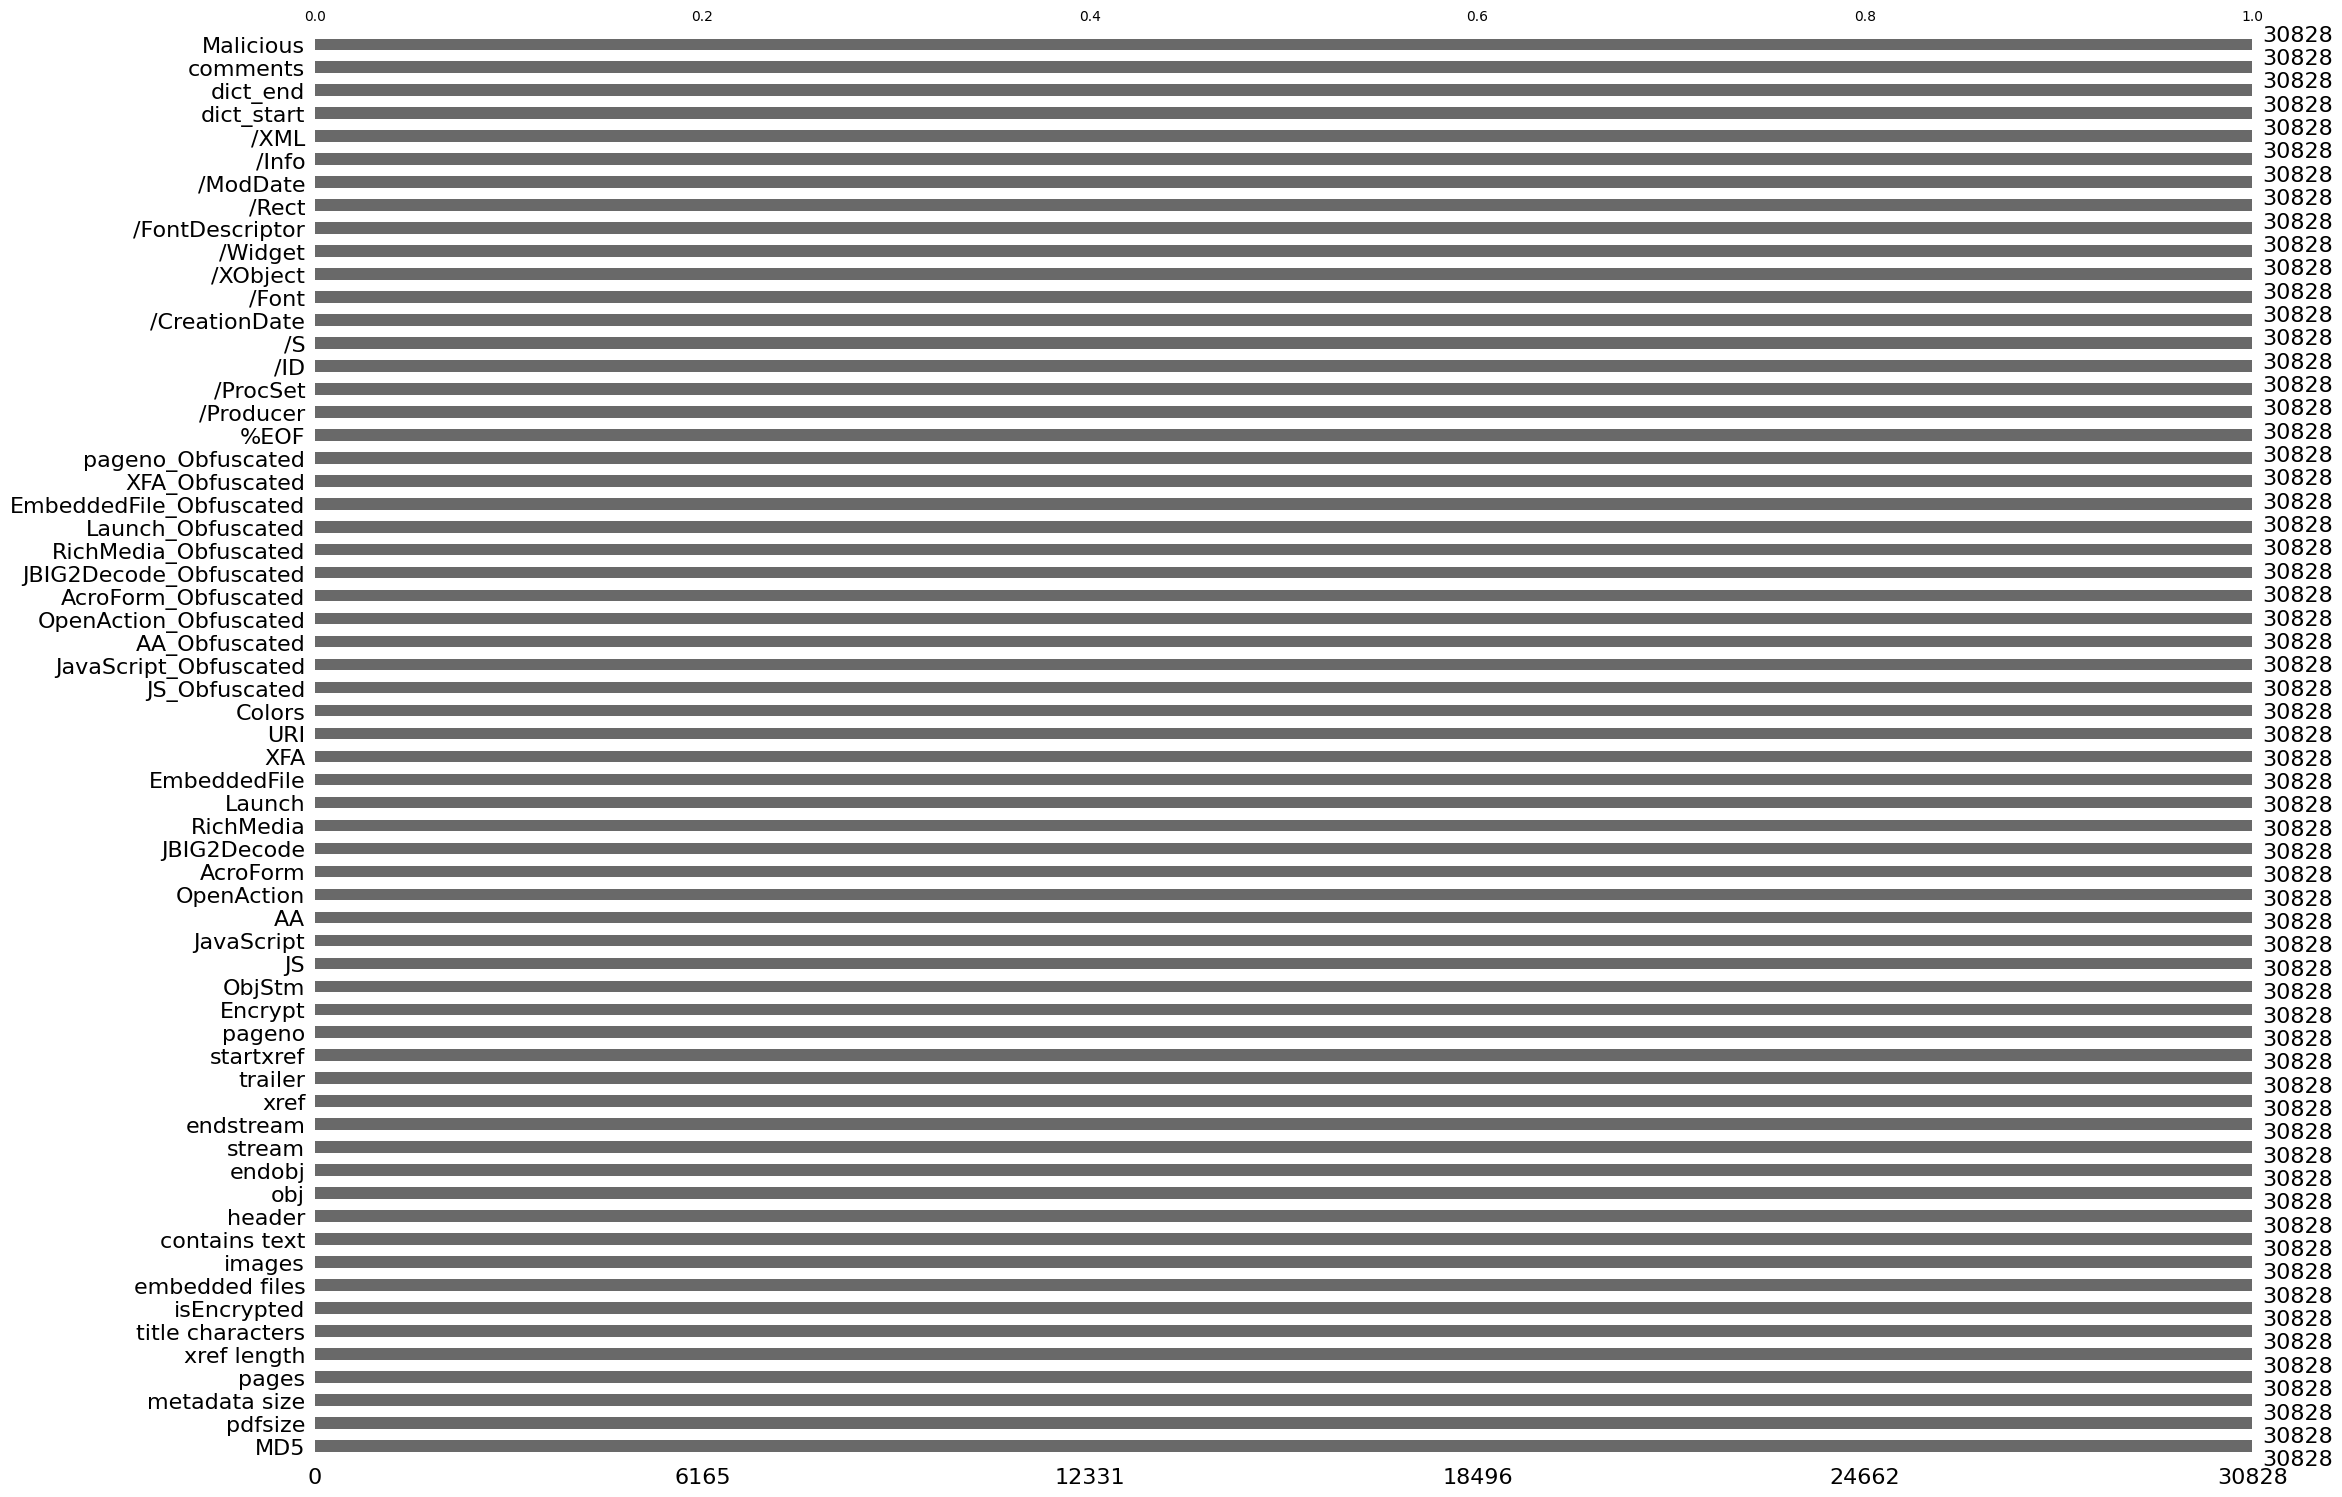

In [11]:

msno.bar(df_pdf);

In [12]:
# store numerical columns to variable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [13]:
# Check missing after applied imputation
df_pdf.isnull().sum()


MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [14]:
sum(df_pdf.isnull().sum())

0

In [15]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)

# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *contains text* 3
Number of unique values for *header* 9
Number of unique values for *Malicious* 2


In [16]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        print(self)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

 # Apply miputation Function
df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [17]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pdfsize                  30828 non-null  float64
 1   metadata size            30828 non-null  float64
 2   pages                    30828 non-null  float64
 3   xref length              30828 non-null  float64
 4   title characters         30828 non-null  float64
 5   isEncrypted              30828 non-null  float64
 6   embedded files           30828 non-null  float64
 7   images                   30828 non-null  float64
 8   contains text            30828 non-null  object 
 9   header                   30828 non-null  object 
 10  obj                      30828 non-null  float64
 11  endobj                   30828 non-null  float64
 12  stream                   30828 non-null  float64
 13  endstream                30828 non-null  float64
 14  xref                  

In [20]:
# Check duplicate points in our dataset
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(17621)

In [21]:
# Check number of samples for each class [Benign, Malicious]
df_pdf.Malicious.value_counts()


Malicious
Yes    21721
No      9107
Name: count, dtype: int64

In [22]:
data = df_pdf.copy()
data.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,3.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,%PDF-1.3,...,0.0,0.0,0.0,1.0,1.0,0.0,16.0,16.0,6.0,Yes
1,3.0,180.0,0.0,8.0,0.0,0.0,0.0,0.0,No,%PDF-1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,6.0,Yes
2,74.0,341.0,1.0,16.0,1.0,0.0,0.0,-1.0,unclear,%PDF-1.4,...,0.0,0.0,0.0,1.0,1.0,0.0,13.0,13.0,2.0,Yes
3,28.0,373.0,4.0,44.0,13.0,0.0,0.0,0.0,Yes,%PDF-1.6,...,0.0,0.0,0.0,1.0,3.0,2.0,29.0,29.0,42.0,No
4,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,%PDF-1.3,...,0.0,0.0,2.0,0.0,0.0,0.0,11.0,11.0,15.0,Yes


## Dropping Obfuscated Columns

In [23]:
data = data.drop(columns=[col for col in data.columns if col.endswith('_Obfuscated')])
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,3.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,No,%PDF-1.3,...,0.0,0.0,0.0,1.0,1.0,0.0,16.0,16.0,6.0,Yes
1,3.0,180.0,0.0,8.0,0.0,0.0,0.0,0.0,No,%PDF-1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,6.0,Yes
2,74.0,341.0,1.0,16.0,1.0,0.0,0.0,-1.0,unclear,%PDF-1.4,...,0.0,0.0,0.0,1.0,1.0,0.0,13.0,13.0,2.0,Yes
3,28.0,373.0,4.0,44.0,13.0,0.0,0.0,0.0,Yes,%PDF-1.6,...,0.0,0.0,0.0,1.0,3.0,2.0,29.0,29.0,42.0,No
4,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,%PDF-1.3,...,0.0,0.0,2.0,0.0,0.0,0.0,11.0,11.0,15.0,Yes


## result and text mapping

In [24]:
data["contains text"].unique()

array(['No', 'unclear', 'Yes'], dtype=object)

In [23]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 32] = data.iloc[:, 32].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,\tMalformed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,\t%PDF-1.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Converting header values (text to float)

In [24]:
data["\theader"].unique()

array(['\t%PDF-1.3', '\tMalformed', '\t%PDF-1.6', '\t%PDF-1.7',
       '\t%PDF-1.0', '\t%PDF-1.4', '\t%PDF-1.5', '\t%PDF-1.1',
       '\t%PDF-1.2'], dtype=object)

In [25]:
original_values = np.array(['\t%PDF-1.0','\t%PDF-1.1','\t%PDF-1.2','\t%PDF-1.3','\t%PDF-1.4','\t%PDF-1.5','\t%PDF-1.6','\t%PDF-1.7','\tMalformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

In [26]:
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Converting objects to numeric values

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           30828 non-null  float64
 1   metadata size     30828 non-null  float64
 2   pages             30828 non-null  float64
 3   xref length       30828 non-null  float64
 4   title characters  30828 non-null  float64
 5   isEncrypted       30828 non-null  float64
 6   embedded files    30828 non-null  float64
 7   images            30828 non-null  float64
 8   contains text     30828 non-null  int64  
 9   	header           30828 non-null  int64  
 10  obj               30828 non-null  float64
 11  endobj            30828 non-null  float64
 12  stream            30828 non-null  float64
 13  endstream         30828 non-null  float64
 14  xref              30828 non-null  float64
 15  trailer           30828 non-null  float64
 16  startxref         30828 non-null  float6

## Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns

In [29]:

X = data.drop(columns=[ data.columns[32]])  # Adjusted indices
y = data.iloc[:, 32]
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           30828 non-null  float64
 1   metadata size     30828 non-null  float64
 2   pages             30828 non-null  float64
 3   xref length       30828 non-null  float64
 4   title characters  30828 non-null  float64
 5   isEncrypted       30828 non-null  float64
 6   embedded files    30828 non-null  float64
 7   images            30828 non-null  float64
 8   contains text     30828 non-null  int64  
 9   	header           30828 non-null  int64  
 10  obj               30828 non-null  float64
 11  endobj            30828 non-null  float64
 12  stream            30828 non-null  float64
 13  endstream         30828 non-null  float64
 14  xref              30828 non-null  float64
 15  trailer           30828 non-null  float64
 16  startxref         30828 non-null  float6

In [30]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Grid Search for AdaBoost Parameters

In [31]:
# warnings.filterwarnings('ignore')

# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0]
# }

# # Create AdaBoost classifier
# ada = AdaBoostClassifier()

# # Perform Grid Search
# grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Test on test set
# test_score = grid_search.score(X_test, y_test)
# print("Test set score:", test_score)

# AdaBoost

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


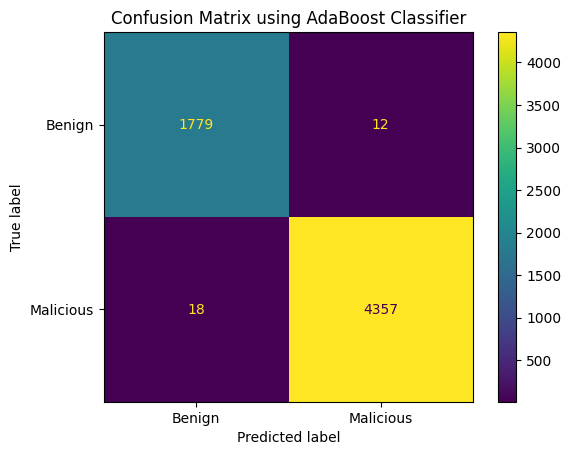

False Positive Rate: 0.006700167504187605
True Positive Rate: 0.9958857142857143
Accuracy Score: 0.9951346091469349


In [32]:
# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Make Predictions
y_pred_ab = ada_boost.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ab).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ab), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_ab)}')


# Grid Search for RF Parameters

In [33]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create RandomForest classifier
# rf = RandomForestClassifier(random_state=42)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                           cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Evaluate on test set
# test_score = grid_search.score(X_test, y_test)
# print("Test set score:", test_score)


# **RandomForest**

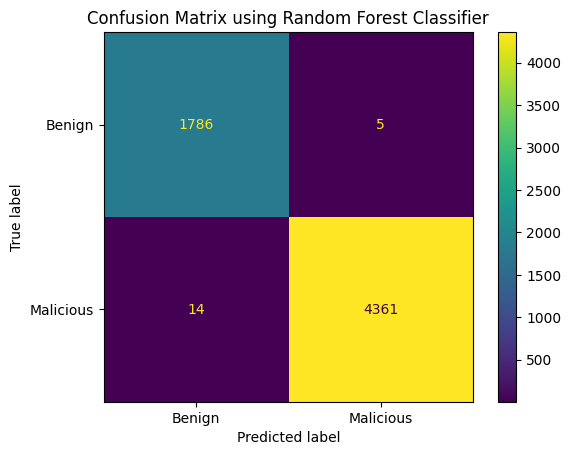

False Positive Rate: 0.0027917364600781687
True Positive Rate: 0.9968
Accuracy Score: 0.9969185857930587


In [34]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

## Feature Importance Chart

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_25428\2611788253.py:25: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


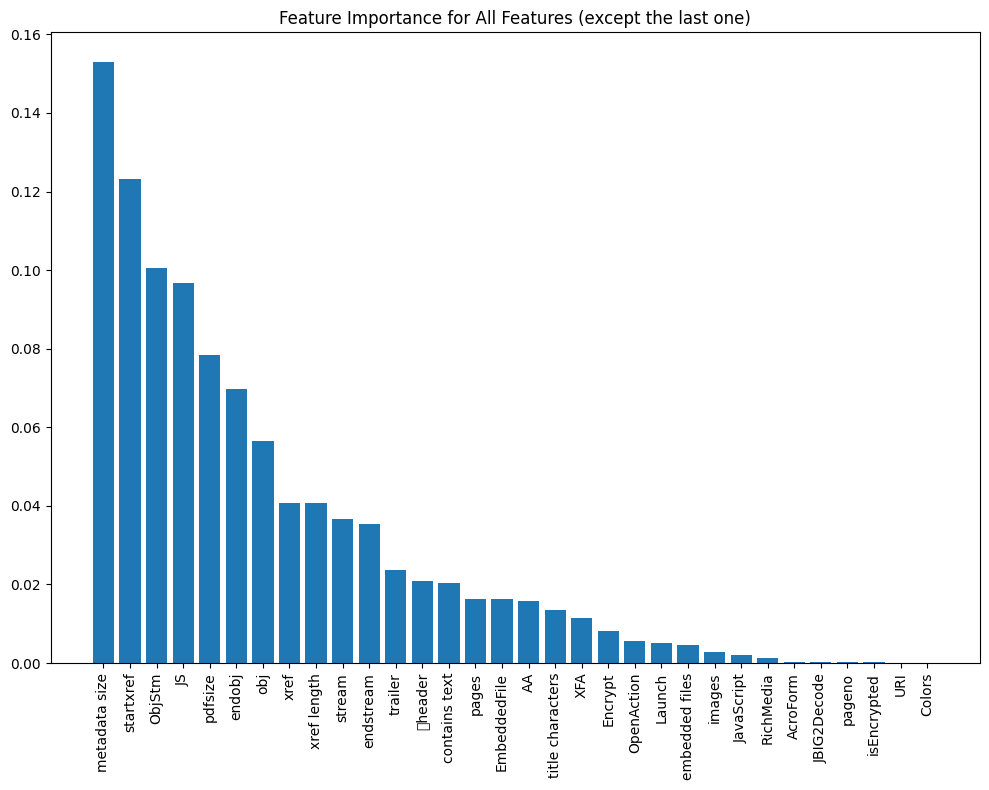

In [35]:
# Assuming your dataset is in 'df'

# Separate features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



## Removing last few columns in Bar Chart above

In [36]:
X1 = data.drop(columns=[data.columns[32],data.columns[26],data.columns[24],data.columns[25],data.columns[5],data.columns[17],data.columns[30], data.columns[31]])  # Adjusted indices
y1 = data.iloc[:, 32]
X1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           30828 non-null  float64
 1   metadata size     30828 non-null  float64
 2   pages             30828 non-null  float64
 3   xref length       30828 non-null  float64
 4   title characters  30828 non-null  float64
 5   embedded files    30828 non-null  float64
 6   images            30828 non-null  float64
 7   contains text     30828 non-null  int64  
 8   	header           30828 non-null  int64  
 9   obj               30828 non-null  float64
 10  endobj            30828 non-null  float64
 11  stream            30828 non-null  float64
 12  endstream         30828 non-null  float64
 13  xref              30828 non-null  float64
 14  trailer           30828 non-null  float64
 15  startxref         30828 non-null  float64
 16  Encrypt           30828 non-null  float6

In [37]:
# Ensure y is aligned with X
y1 = y1.iloc[:X1.shape[0]]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)



## Re-run RandomForest

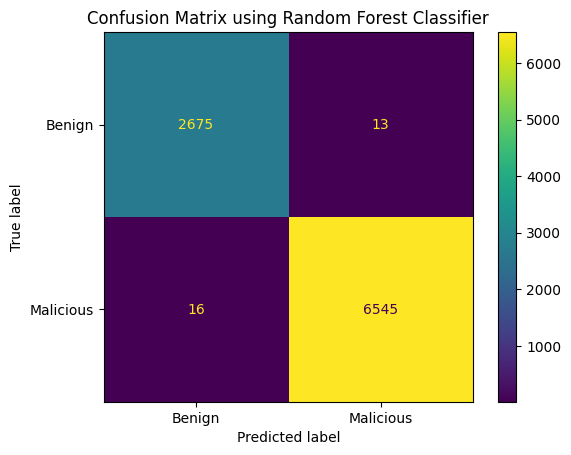

False Positive Rate: 0.004836309523809524
True Positive Rate: 0.997561347355586
Accuracy Score: 0.9968645258946913


In [38]:
# Initialize Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
rf1.fit(X_train1, y_train1)

# Make Predictions
y_pred_rf1 = rf1.predict(X_test1)

# Confusion Matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, y_pred_rf1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_rf1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp1 / (fp1 + tn1)}')
print(f'True Positive Rate: {tp1 / (tp1 + fn1)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_rf1)}')

## Feature Importance Chart

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_25428\1875906854.py:19: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


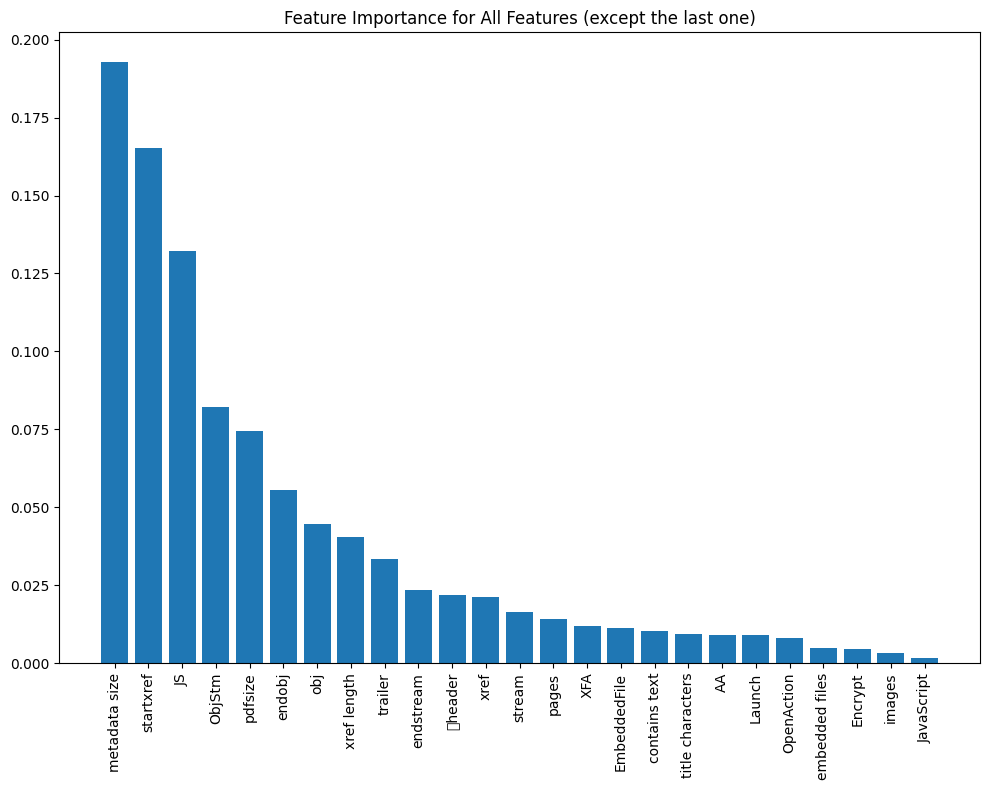

In [39]:
# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = X1.columns[:]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf1.fit(X1, y1)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# **ADABoost Re-run**

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


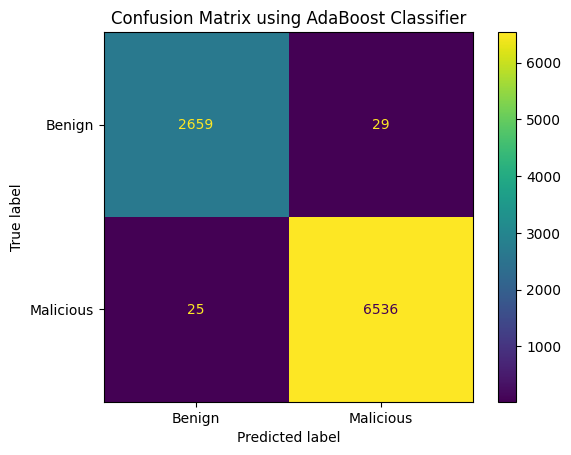

False Positive Rate: 0.010788690476190476
True Positive Rate: 0.9961896052431032
Accuracy Score: 0.9941615309763218


In [40]:
# Initialize AdaBoost Classifier
ada_boost1 = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

# Train the model
ada_boost1.fit(X_train1, y_train1)

# Make Predictions
y_pred_ab1 = ada_boost1.predict(X_test1)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred_ab1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_ab1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_ab1)}')


# Grid Search for MLP Parameters

In [41]:
# # Define parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
#     'activation': ['relu', 'tanh'],
#     'learning_rate_init': [0.001, 0.01],
#     'max_iter': [1000]
# }

# # Initialize MLPClassifier
# mlp = MLPClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Test best model
# best_model = grid_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print("Test set score:", test_score)

# **MLP**

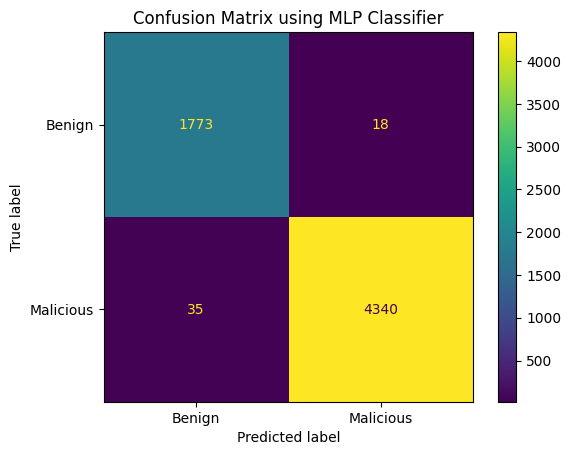

False Positive Rate: 0.010050251256281407
True Positive Rate: 0.992
Accuracy Score: 0.9914044761595848


In [42]:
# Initialize MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using MLP Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_mlp)}')


# **Stacking Classifier**

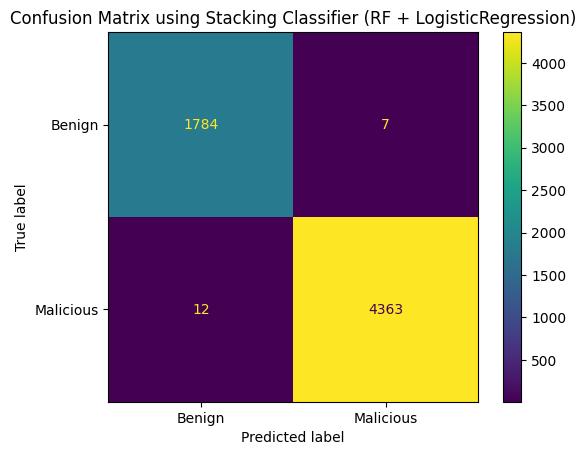

False Positive Rate: 0.003908431044109436
True Positive Rate: 0.9972571428571428
Accuracy Score: 0.9969185857930587


In [43]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize Random Forest Classifier as the base model
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Create Stacking Classifier using RandomForest as base model and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[('rf', rf_base)],  # Base model (RandomForest)
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


# **MLP and RandomForest as Base learner**

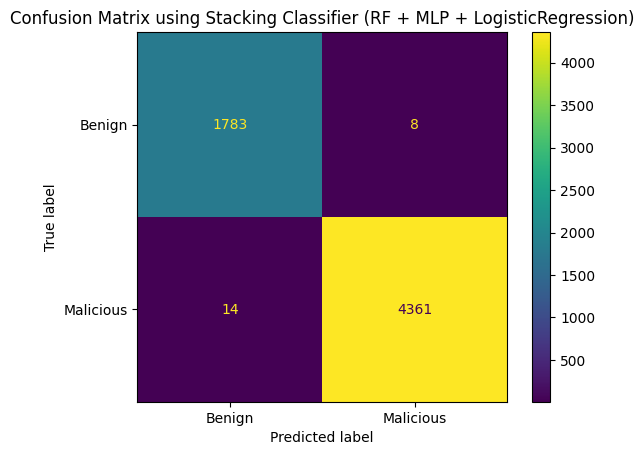

False Positive Rate: 0.00446677833612507
True Positive Rate: 0.9968
Accuracy Score: 0.9964320467077522


In [44]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize Random Forest Classifier as one of the base models
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Initialize MLP Classifier as another base model
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Create Stacking Classifier using RandomForest and MLP as base models and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_base),  # Random Forest base model
        ('mlp', mlp_base)  # MLP base model
    ],
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


# Grid Search for SVM Parameters

In [45]:
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['rbf', 'linear'],
#     'gamma': ['scale', 'auto', 0.1, 0.01]
# } 

# # Create SVM classifier with grid search
# svm = GridSearchCV(
#     SVC(random_state=42),
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Train the model
# svm.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred = svm.predict(X_test_scaled)

# # Print results
# print(f"Best parameters: {svm.best_params_}")
# print(f"Best cross-validation accuracy: {svm.best_score_:.4f}")
# print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

# SVM

Test accuracy: 0.9943


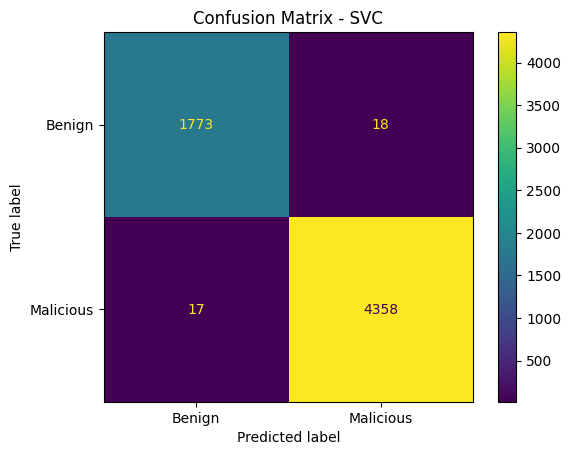

False Positive Rate: 0.010050251256281407
True Positive Rate: 0.9961142857142857


In [46]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier with best parameters found from grid search
svc = SVC(C=100, kernel='rbf', gamma='scale', random_state=42)

# Train the model
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Create confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot()
plt.title('Confusion Matrix - SVC')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')

# MLP, RandomForest and SVM as Base learner

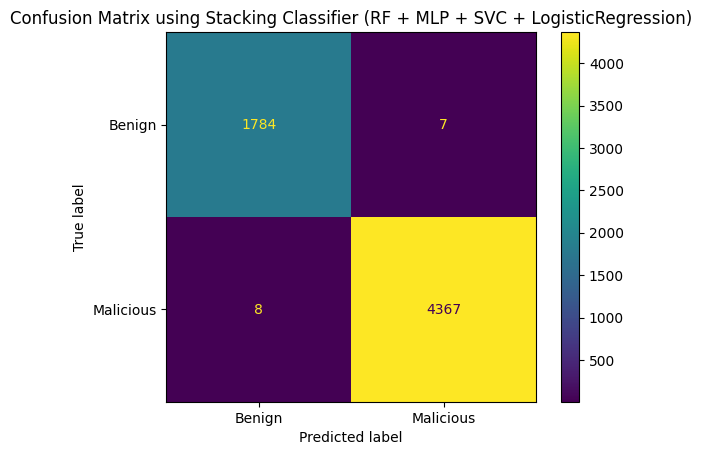

False Positive Rate: 0.003908431044109436
True Positive Rate: 0.9981714285714286
Accuracy Score: 0.9975673045734674


In [47]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize Random Forest Classifier as one of the base models
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Initialize MLP Classifier as another base model
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Initialize SVM as another base model
svc_base = SVC(C=100, kernel='rbf', gamma='scale', probability=True, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Stacking Classifier using RandomForest, MLP, and SVC as base models and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_base),  # Random Forest base model
        ('mlp', mlp_base),  # MLP base model
        ('svc', svc_base)  # SVM base model
    ],
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + SVC + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')
